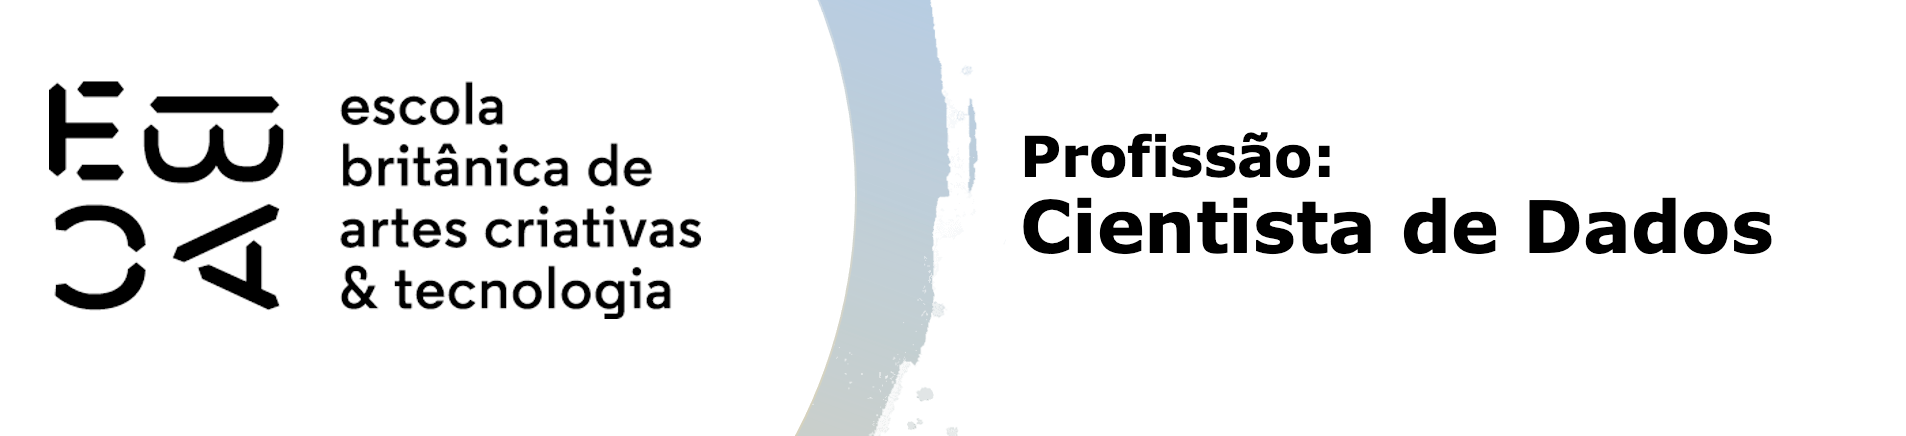

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [60]:
df = pd.read_csv('Profissão Cientista de Dados M29 - online_shoppers_intention.csv')

In [61]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [62]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [64]:
# Quantidade de linhas e colunas
df.shape

(12330, 18)

In [65]:
# Tipos de dados e valores ausentes
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [66]:
# Estatísticas descritivas para colunas numéricas
df.describe()    

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [100]:
# Selecionar as 6 primeiras variáveis
var = df.iloc[:, :6]

# Padronização
pad = StandardScaler()
var_pad = pad.fit_transform(var)

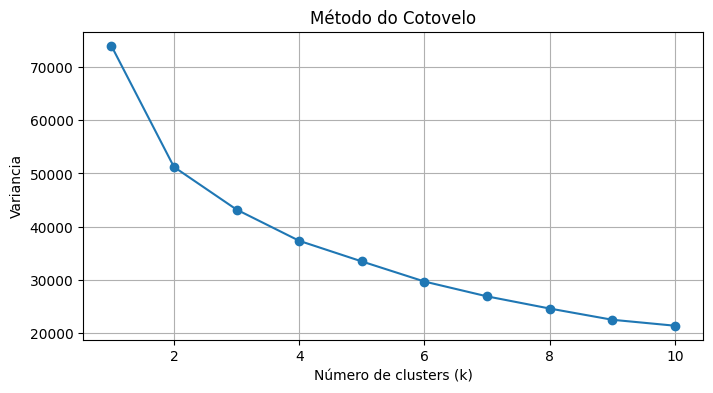

In [102]:
# Método do cotovelo
variancia = []  # Refere-se à soma das diferenças quadráticas entre os pontos de dados e o centro do cluster.

# Testar de 1 a 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(var_pad)
    variancia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), variancia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Variancia')
plt.grid()
plt.show()

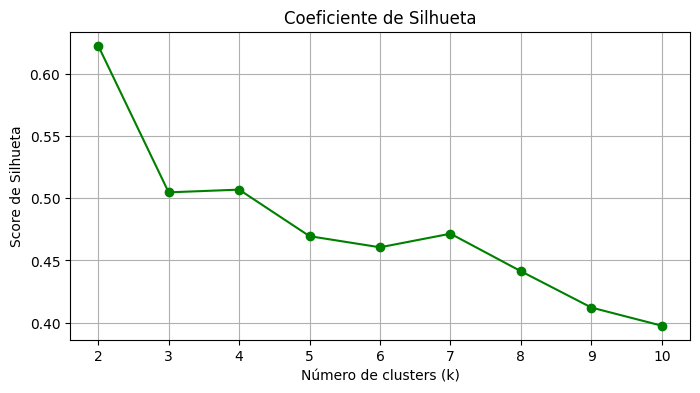

In [104]:
# Método da Silhueta
silhouette_scores = []

for k in range(2, 11):  # Começa de 2, pois Silhueta exige ao menos 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(var_pad)
    score = silhouette_score(var_pad, labels)
    silhouette_scores.append(score)

# Plotar o gráfico de silhueta
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score de Silhueta')
plt.grid()
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [106]:
# KMeans com k = 2 (melhor silhueta) e k = 3 (ponto de cotovelo)
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_3 = KMeans(n_clusters=3, random_state=42)

df['Cluster_2'] = kmeans_2.fit_predict(var_pad)
df['Cluster_3'] = kmeans_3.fit_predict(var_pad)

In [107]:
# K=2
df.groupby('Cluster_2').mean(numeric_only=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster_3
Cluster_2,,,,,,,,,,,,,,,,,
0,1.494611,44.058464,0.188788,7.037474,21.363490,776.283968,0.024793,0.046943,5.375182,0.066251,2.125544,2.377671,3.173001,4.137455,0.229628,0.135092,1.754774
1,7.269406,302.764289,2.404110,200.115446,94.329909,3721.283722,0.006483,0.019708,8.993081,0.032306,2.114726,2.232877,2.992580,3.659817,0.250571,0.273402,0.338470


Sugestão de nomes para os clusters  

Cluster 0 → "Visitantes Rápidos"


Cluster 1 → "Visitantes Engajados"

In [111]:
# K =3
df.groupby('Cluster_3').mean(numeric_only=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster_2
Cluster_3,,,,,,,,,,,,,,,,,
0,6.523289,251.030033,0.973674,42.301835,55.539490,2056.320976,0.006500,0.019944,9.071275,0.036290,2.106116,2.274200,3.192791,3.798299,0.239773,0.231268,0.474686
1,7.058201,266.421802,4.086420,458.371554,138.380952,5731.105279,0.006750,0.019862,7.705625,0.030688,2.102293,2.216931,2.791887,3.499118,0.271605,0.306878,1.000000
2,0.907898,24.277938,0.160103,6.531608,18.900366,689.114236,0.027302,0.050633,4.933127,0.069981,2.130084,2.387669,3.156983,4.176458,0.228319,0.125134,0.001399


Sugestão de nomes para os clusters

Cluster 0 → "Visitantes Moderados"

Cluster 1 → "Visitantes  Engajados"

Cluster 2 → "Visitantes Rápidos"

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [121]:

print("Avaliação com Cluster_2:")
print(df.groupby('Cluster_2')[['BounceRates', 'Revenue']].mean())

print("\nAvaliação com Cluster_3:")
print(df.groupby('Cluster_3')[['BounceRates', 'Revenue']].mean())

Avaliação com Cluster_2:
           BounceRates   Revenue
Cluster_2                       
0             0.024793  0.135092
1             0.006483  0.273402

Avaliação com Cluster_3:
           BounceRates   Revenue
Cluster_3                       
0             0.006500  0.231268
1             0.006750  0.306878
2             0.027302  0.125134


Nessa análise, tanto o K = 2 qanto no K = 3, o grupo que contém os clientes mais propensos a comprar é o grupo 1, onde no k =2 a probabilidade de compra é de 27,3% e rejeição de  apenas 0,6%, e no k = 3 essa probabilidade é de 30,7% para compras e 0,6% de rejeição.